# Assignment 1 : Thompson Sampling for Multi-armed Bandit

###### Due date : 22/01/2018

###### By : Julien Roy and David Kanaa

### Section 1 : Summary of Thompson Sampling

Thompson Sampling is an approach that aims to balance the exploration and exploitation dilemma in RL or decision-making problems. It is particularly useful in online decision problems and can be applied to a wide variety of problem settings. It achieves better results than simpler algorithm such as $\epsilon$-greedy by allocating its exploration effort intelligently, based on the uncertainty around each action's value estimation, instead of wasting time by simply exploring every action with the same probability.

The process is simple. The agent uses a prior based on which the reward of each action is distributed. At each timestep, instead of greedily choosing the action that maximizes the expected reward based on the previous sequence, it greedily chooses an action according to a set of *sampled* action-values. It then simply execute the chosen action, collects the reward, and updates its model for that action. As time passes, its estimated reward distributions over each action become more and more accurate, and their variance diminish, according it to stabilize its behavior by choosing the optimal action every timestep.

**Thompson Sampling Algorithm** (taken from [1])

**for** t = 1,2,... **do**
1. Sample $\hat{\theta}$ ~ $p$ (where $p$ is our model's distribution)
2. Choose action $x_t$ that maximizes the expected reward given $x_t$, according to $\hat{\theta}$
3. Apply $x_t$ and observe $y_t$
4. Update the distribution $p$


The strengh of Thompson sampling lies in the fact that the exploration is driven by the amount of uncertainty over each action. An action that has been chosen many times but hasn't the best estimated expectation will be written off, but an action that has a low average reward but has only been selected a few times will still have high variance and therefore should produce, from time to time, a higher sample that will allow it to be explored further.

As mentioned earlier, Thompson Sampling is well suited for online decision problems requiring exploration. However, it doesn't perform well on sequential or highly non-stationary problems, or on more sophisticated problems in which some action's result are informative regarding which action should be performed next.



[1] : Russo, D., Van Roy, B., Kazerouni, A., & Osband, I. (2017). A Tutorial on Thompson Sampling. arXiv preprint arXiv:1707.02038.

### Section 2 : Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
% matplotlib inline

###### Example of 10-arms Bandit with arms' mean normally distributed

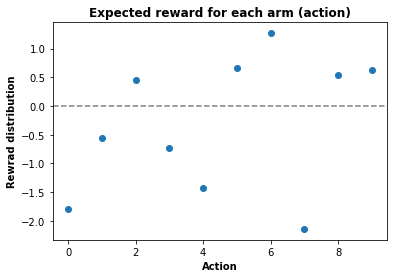

In [2]:
means = np.random.normal(0., 1., size=(10,))

plt.scatter(np.arange(10), means)
plt.axhline(y=0., color='gray', linestyle='--')
plt.xlabel("Action", fontweight='bold')
plt.ylabel("Rewrad distribution", fontweight='bold')
plt.title("Expected reward for each arm (action)", fontweight='bold')
plt.show()

###### Problem setups

In [3]:
class BanditMachine(object):
    
    def __init__(self, reward_distrib_family, arms_mean, arms_var, k=10):
        self.means = np.random.normal(arms_mean, arms_var, size=(k,))
        self.reward_distrib_family = reward_distrib_family
    
    def press_arm(self, arm_id):
        if self.reward_distrib_family == 'normal':
            return np.random.normal(self.means[arm_id], 1.)
        
        elif  self.reward_distrib_family == 'uniform':
            return np.random.uniform(self.means[arm_id]-3., self.means[arm_id]+3.)

###### Algorithms

In [4]:
def e_greedy_algorithm(e, bandit, max_steps):
    
    reward_log = []
    action_log = []
    regret_log = []
    optimal_action = np.argmax(bandit.means)
    
    # Initializes Q_t(a) and N(a)
    action_values = np.zeros(shape=(10,), dtype=np.float) # estimates of the real action values, which are the bandit.means
    action_freq = np.zeros(shape=(10,), dtype=np.int)

    for t in range(1, max_steps+1):

        # Action selection (epsilon-greedy)
        greed = np.random.uniform()
        if greed < e:
            a_t = np.random.randint(low=0, high=10)
        else:
            a_t = np.argmax(action_values)
        
        # Plays the bandit machine and get the reward
        R_t = bandit.press_arm(a_t)

        # Updates the action value
        action_freq[a_t] += 1
        action_values[a_t] = action_values[a_t] + (1 / action_freq[a_t]) * (R_t - action_values[a_t])
        
        reward_log.append(R_t)
        action_log.append(a_t)
        regret_log.append(bandit.means[optimal_action] - R_t)
    
    optimal_action_log = (np.array(action_log) == optimal_action)
    return reward_log, optimal_action_log, regret_log

In [5]:
def UCB_algorithm(c, bandit, max_steps):
    
    reward_log = []
    action_log = []
    regret_log = []
    optimal_action = np.argmax(bandit.means)
    
    # Initializes Q_t(a) and N(a)
    action_values = np.zeros(shape=(10,), dtype=np.float) # estimates of the real action values, which are the bandit.means
    action_freq = np.ones(shape=(10,), dtype=np.int)

    for t in range(1, max_steps+1):
        
        # Action selection (UCB)
        a_t = np.argmax(action_values + c * np.sqrt(np.log(t) / action_freq))
    
        # Plays the bandit machine and get the reward
        R_t = bandit.press_arm(a_t)

        # Updates the action value
        action_freq[a_t] += 1
        action_values[a_t] = action_values[a_t] + (1 / action_freq[a_t]) * (R_t - action_values[a_t])

        reward_log.append(R_t)
        action_log.append(a_t)
        regret_log.append(bandit.means[optimal_action] - R_t)
        
    optimal_action_log = (np.array(action_log) == optimal_action)
    return reward_log, optimal_action_log, regret_log

In [ ]:
def Thompson_Sampling_algorithm(some_param, bandit, max_steps):
    
    reward_log = []
    action_log = []
    regret_log = []
    optimal_action = np.argmax(bandit.means)
    
    # DOES SOMETHING
    
    return reward_log, optimal_action_log, regret_log

###### Hyper-parameter search

In [6]:
def hyperparameter_search(runs, max_steps=1000, n_machines=2000, reward_distrib='normal', arms_mean=0., arms_var=1., k=10):
    """
        runs : a list of tuples as (algo, [hyperparams], name)
    """
    plt.figure(figsize=(20, 6))
    best_runs = {}
    
    for j, run in enumerate(runs):

        algo = runs[j][0]
        hyperparams = runs[j][1]
        name = runs[j][2]
        
        avg_regret_per_step = []
        print("Processing {2} different runs for algo {0} : {1}".format(j+1, name, len(hyperparams)))
        for param in tqdm(hyperparams):
            
            master_reward_log = np.zeros(shape=(n_machines, max_steps), dtype=np.float)
            master_action_log = np.zeros(shape=(n_machines, max_steps), dtype=np.bool)
            master_regret_log = np.zeros(shape=(n_machines, max_steps), dtype=np.float)

            for i in range(n_machines):
                bandit = BanditMachine(reward_distrib, arms_mean, arms_var, k)
                reward_log, optimal_action_log, regret_log = algo(param, bandit, max_steps)

                master_reward_log[i, :] = reward_log
                master_action_log[i, :] = optimal_action_log
                master_regret_log[i, :] = regret_log

            avg_reward_log = np.mean(master_reward_log, axis=0)
            avg_action_log = np.mean(master_action_log, axis=0) * 100.
            avg_regret_log = np.mean(master_regret_log, axis=0)
            avg_regret_per_step.append(np.mean(avg_regret_log))
            
            if avg_regret_per_step[-1] == min(avg_regret_per_step):
                
                best_runs[name] = (avg_action_log, avg_regret_log, param)
                

        plt.semilogx(hyperparams, avg_regret_per_step, label=name)
        plt.xlabel("Parameter values", fontweight='bold')
        plt.ylabel("Average Regret per step", fontweight='bold')
        plt.legend(loc='best')

    plt.show()
    
    return best_runs


def plot_best_results(best_runs):
    
    plt.figure(figsize=(20, 6))
    for name in best_runs.keys():

        avg_action_log = best_runs[name][0]
        avg_regret_log = best_runs[name][1]

        if name == 'UCB':
            run_label = 'UCB : c={0}'.format(best_runs[name][2])

        elif name == 'e-greedy':
            run_label = 'e-greedy : e={0}'.format(best_runs[name][2])

        else:
            raise ValueError('Unrecognized algorithm.')

        plt.subplot(1,2,1)
        plt.plot(range(avg_action_log.shape[0]), avg_action_log, label=run_label)
        plt.xlabel("Steps", fontweight='bold')
        plt.ylabel("Optimal action (%)", fontweight='bold')
        plt.legend(loc='best')

        plt.subplot(1,2,2)
        plt.plot(range(avg_regret_log.shape[0]), avg_regret_log, label=run_label)
        plt.xlabel("Steps", fontweight='bold')
        plt.ylabel("Average Regret", fontweight='bold')
        plt.legend(loc='best')

    plt.show()

### Section 3 : Experiments

###### Bandit environment 1 : 
* Reward distribution family : Gaussian
* Number of arms : 10

Processing 6 different runs for algo 1 : e-greedy


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [02:47<00:00, 27.83s/it]


Processing 6 different runs for algo 2 : UCB


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [04:45<00:00, 47.54s/it]


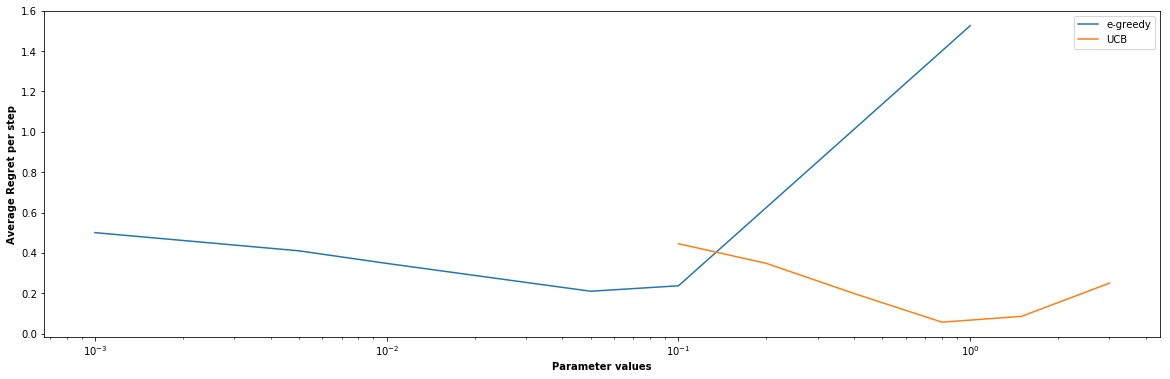

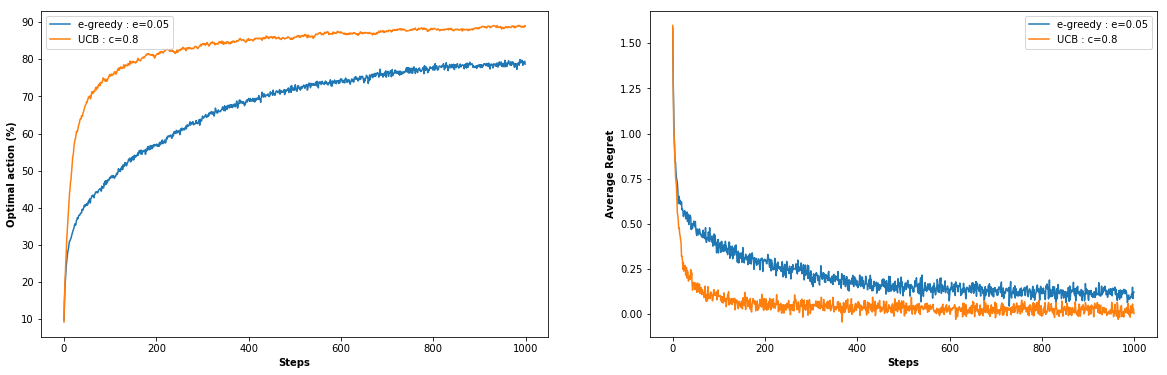

In [7]:
e_values = [0.001, 0.005, 0.01, 0.05, 0.1, 1.]
c_values = [0.1, 0.2, 0.4, 0.8, 1.5, 3.]

best_runs = hyperparameter_search(runs=[(e_greedy_algorithm, e_values, 'e-greedy'), 
                                        (UCB_algorithm, c_values, 'UCB')],
                                  max_steps=1000,
                                  n_machines=2000,
                                  reward_distrib='normal', 
                                  arms_mean=0., 
                                  arms_var=1., 
                                  k=10)

plot_best_results(best_runs)

###### Bandit environment 2 : 
* Reward distribution family : Gaussian (but each arm's distribution mean are even less spaced out)
* Number of arms : 10

Processing 6 different runs for algo 1 : e-greedy


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [02:29<00:00, 24.95s/it]


Processing 6 different runs for algo 2 : UCB


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:56<00:00, 19.44s/it]


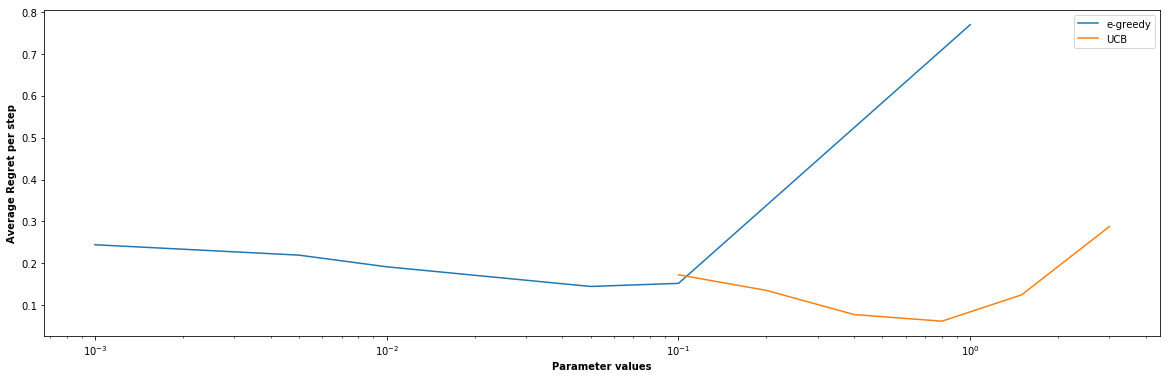

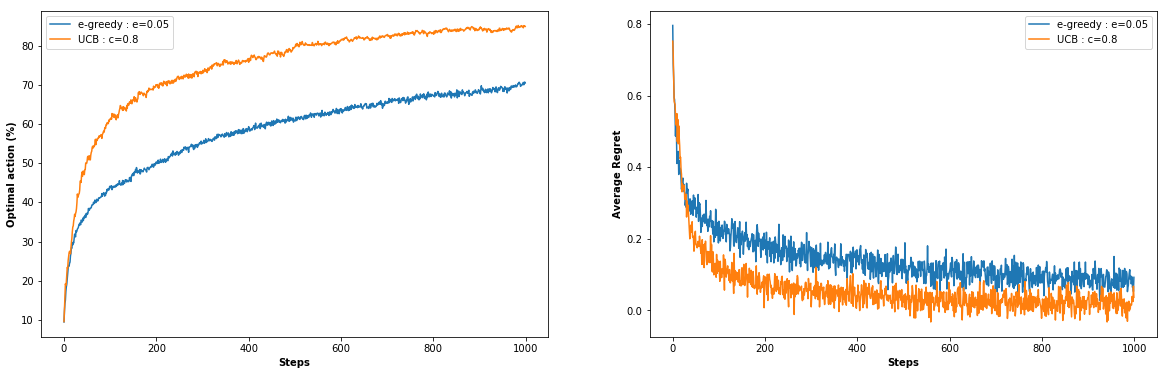

In [8]:
e_values = [0.001, 0.005, 0.01, 0.05, 0.1, 1.]
c_values = [0.1, 0.2, 0.4, 0.8, 1.5, 3.]

best_runs = hyperparameter_search(runs=[(e_greedy_algorithm, e_values, 'e-greedy'), 
                                        (UCB_algorithm, c_values, 'UCB')],
                                  max_steps=1000,
                                  n_machines=2000,
                                  reward_distrib='normal', 
                                  arms_mean=0., 
                                  arms_var=0.5, 
                                  k=10)

plot_best_results(best_runs)

###### Bandit environment 3 : 
* Reward distribution family : Uniform
* Number of arms : 25

Processing 6 different runs for algo 1 : e-greedy


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:04<00:00, 10.81s/it]


Processing 6 different runs for algo 2 : UCB


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [02:01<00:00, 20.22s/it]


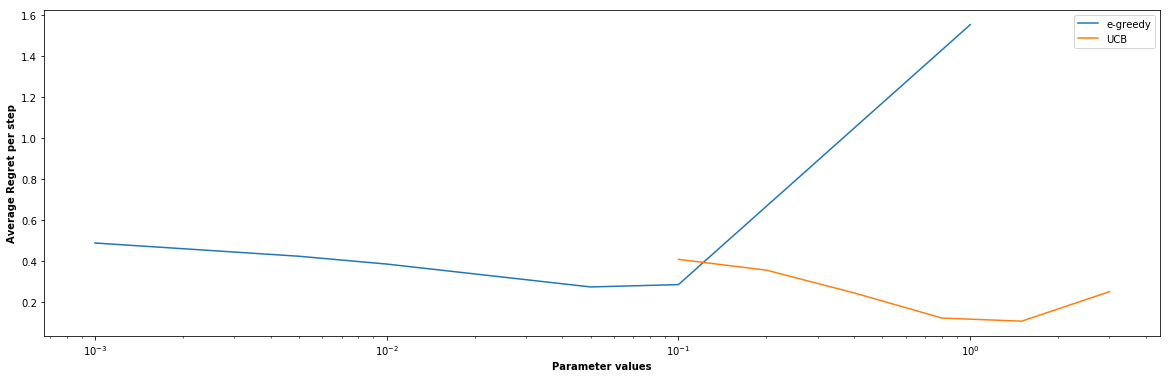

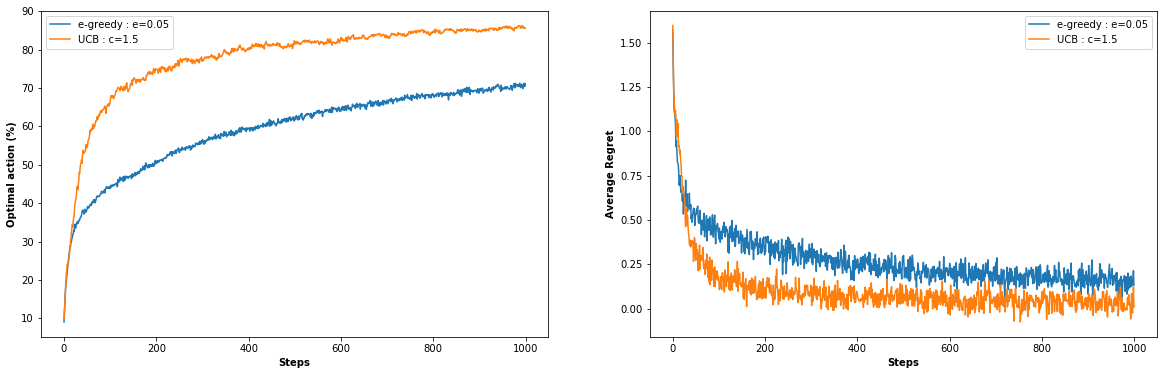

In [9]:
e_values = [0.001, 0.005, 0.01, 0.05, 0.1, 1.]
c_values = [0.1, 0.2, 0.4, 0.8, 1.5, 3.]

best_runs = hyperparameter_search(runs=[(e_greedy_algorithm, e_values, 'e-greedy'), 
                                        (UCB_algorithm, c_values, 'UCB')],
                                  max_steps=1000,
                                  n_machines=2000,
                                  reward_distrib='uniform', 
                                  arms_mean=0., 
                                  arms_var=1., 
                                  k=10)

plot_best_results(best_runs)

###### Bandit environment 4 : 
* Reward distribution family : Gaussian
* Number of arms : 30

Processing 6 different runs for algo 1 : e-greedy


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [01:17<00:00, 12.89s/it]


Processing 6 different runs for algo 2 : UCB


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [02:06<00:00, 21.00s/it]


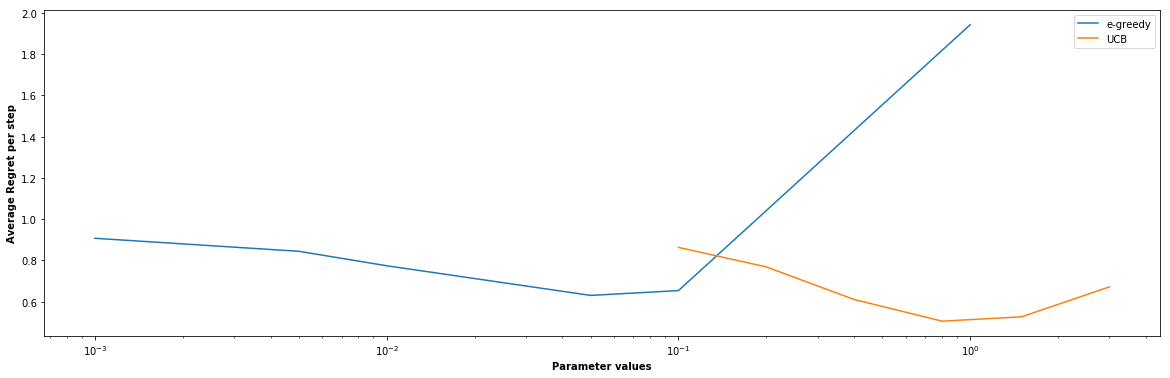

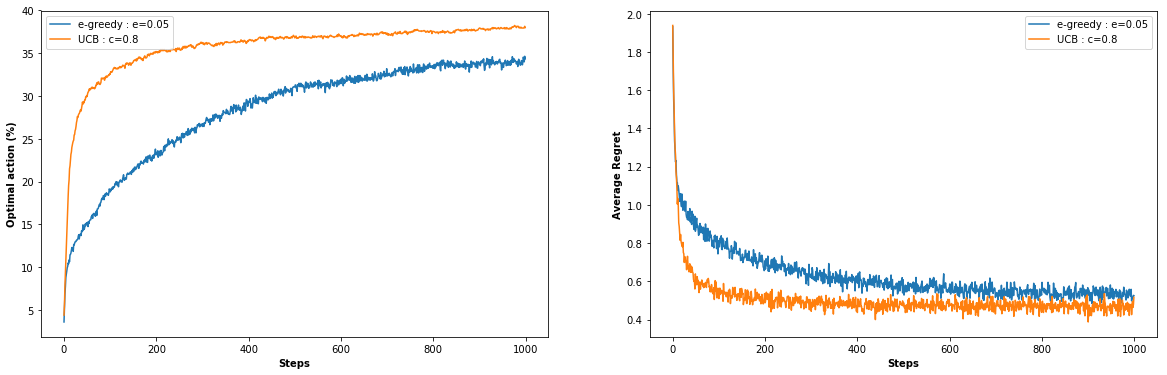

In [10]:
e_values = [0.001, 0.005, 0.01, 0.05, 0.1, 1.]
c_values = [0.1, 0.2, 0.4, 0.8, 1.5, 3.]

best_runs = hyperparameter_search(runs=[(e_greedy_algorithm, e_values, 'e-greedy'), 
                                        (UCB_algorithm, c_values, 'UCB')],
                                  max_steps=1000,
                                  n_machines=2000,
                                  reward_distrib='normal', 
                                  arms_mean=0., 
                                  arms_var=1., 
                                  k=25)

plot_best_results(best_runs)